# Potentiel s(c)olaire

Données disponibles :
* [Annuaire de l'éducation gouv.fr](https://data.education.gouv.fr/explore/dataset/fr-en-annuaire-education/information/?disjunctive.type_etablissement&disjunctive.libelle_academie&disjunctive.libelle_region&disjunctive.ministere_tutelle&disjunctive.appartenance_education_prioritaire&disjunctive.nom_commune&disjunctive.code_postal&disjunctive.code_departement)
* [BD Topo](https://geoservices.ign.fr/bdtopo)

## Données gouv.fr

### Récupération des données

In [ ]:
# Je commence par installer le module requests pour récupérer les données via API
#!pip install requests

In [ ]:
# Import des modules utilisés
import requests
import pandas as pd

In [ ]:
# Définition de l'url qui contient les données
url = 'https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/exports/json'

# Récupération des données
response = requests.get(url)

# Vérification de la bonne récupération
if response.status_code == 200:
  data = response.json()
  print("Données disponibles !\n")
  # Création du jeu de données
  df = pd.DataFrame(data)
  print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
else:
  print(f"Erreur: {response.status_code}")

Données disponibles !

Le dataframe contient 69649 lignes et 72 colonnes. Ci-dessous un extrait :



In [ ]:
# Affichage des premières lignes du jeu de données
df.head()

,identifiant_de_l_etablissement,nom_etablissement,type_etablissement,statut_public_prive,adresse_1,adresse_2,adresse_3,code_postal,code_commune,nom_commune,...,libelle_nature,code_type_contrat_prive,pial,etablissement_mere,type_rattachement_etablissement_mere,code_circonscription,code_zone_animation_pedagogique,libelle_zone_animation_pedagogique,code_bassin_formation,libelle_bassin_formation
0,0470132N,Ecole primaire Jean-Irénée Lagnoux,Ecole,Public,312 rue René Marty,AU BOURG,47240 LAFOX,47240,47128,Lafox,...,ECOLE DE NIVEAU ELEMENTAIRE,99,0470720C,None,None,0470897V,047030,ZAP 047030 AGEN,None,None
1,0470154M,Ecole élémentaire Jean Villemin,Ecole,Public,4 place Jean-François Poncet,LE BOURG,47480 PONT DU CASSE,47480,47209,Pont-du-Casse,...,ECOLE DE NIVEAU ELEMENTAIRE,99,0470677F,None,None,0470897V,047030,ZAP 047030 AGEN,None,None
2,0470160U,Ecole élémentaire Marc Castelnérac,Ecole,Public,2 rue André Tissidre,None,47510 FOULAYRONNES,47510,47100,Foulayronnes,...,ECOLE DE NIVEAU ELEMENTAIRE,99,0470005A,None,None,0470897V,047030,ZAP 047030 AGEN,04401,AGEN-NERAC
3,0470172G,Ecole primaire Didier Lapeyre,Ecole,Public,Rue de la Gare,Saint Pierre de Gaubert,47550 BOE,47550,47031,Boé,...,ECOLE DE NIVEAU ELEMENTAIRE,99,0470008D,None,None,0470897V,047030,ZAP 047030 AGEN,None,None
4,0470175K,Ecole primaire Simone Veil,Ecole,Public,24 boulevard Scaliger,None,47000 AGEN,47000,47001,Agen,...,ECOLE DE NIVEAU ELEMENTAIRE,99,0470005A,None,None,0470897V,047030,ZAP 047030 AGEN,04401,AGEN-NERAC


In [ ]:
# Vérification que toutes les données ont été exportées

# Url permettant d'accéder aux enregistrements (dont le total_count)
url_ = 'https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/records'

# Récupération via appel GET
response_ = requests.get(url_)

# On s'assure que l'appel a fonctionné
if response_.status_code == 200:
    data_ = response_.json()
else:
    print(f"Error: {response_.status_code}")

# Enfin, on compare avec la taille attendue
try:
  assert data_['total_count'] == len(df)
except AssertionError as e:
  print(f"Données non complètement récupérées, erreur : {f}.")
else:
  print("Toutes les données sont bien récupérées.")

Toutes les données sont bien récupérées.


### Analyse des colonnes

In [ ]:
# Liste des colonnes pour analyse
list(df.columns)

['identifiant_de_l_etablissement',
 'nom_etablissement',
 'type_etablissement',
 'statut_public_prive',
 'adresse_1',
 'adresse_2',
 'adresse_3',
 'code_postal',
 'code_commune',
 'nom_commune',
 'code_departement',
 'code_academie',
 'code_region',
 'ecole_maternelle',
 'ecole_elementaire',
 'voie_generale',
 'voie_technologique',
 'voie_professionnelle',
 'telephone',
 'fax',
 'web',
 'mail',
 'restauration',
 'hebergement',
 'ulis',
 'apprentissage',
 'segpa',
 'section_arts',
 'section_cinema',
 'section_theatre',
 'section_sport',
 'section_internationale',
 'section_europeenne',
 'lycee_agricole',
 'lycee_militaire',
 'lycee_des_metiers',
 'post_bac',
 'appartenance_education_prioritaire',
 'greta',
 'siren_siret',
 'nombre_d_eleves',
 'fiche_onisep',
 'position',
 'type_contrat_prive',
 'libelle_departement',
 'libelle_academie',
 'libelle_region',
 'coordx_origine',
 'coordy_origine',
 'epsg_origine',
 'nom_circonscription',
 'latitude',
 'longitude',
 'precision_localisation',

In [ ]:
print(f"Valeurs uniques : {len(df['identifiant_de_l_etablissement'].unique())}\n")
df['identifiant_de_l_etablissement'].sample(n=5, random_state=23)

Valeurs uniques : 69567



,identifiant_de_l_etablissement
38178,0330091V
55129,0780891V
8413,0573378M
61005,0311451J
39457,0660872P


In [ ]:
print(f"Valeurs uniques : {len(df['nom_etablissement'].unique())}\n")
df['nom_etablissement'].sample(n=5, random_state=23)

Valeurs uniques : 42631



,nom_etablissement
38178,Collège Les Dagueys
55129,Ecole élémentaire Ferdinand Buisson
8413,Ecole Primaire B. Rabas
61005,Ecole primaire privée Saint-Louis
39457,Collège privé Pompeu Fabra


In [ ]:
print(f"Valeurs uniques : {len(df['type_etablissement'].unique())}\n")
df['type_etablissement'].sample(n=5, random_state=23)

Valeurs uniques : 9



,type_etablissement
38178,Collège
55129,Ecole
8413,Ecole
61005,Ecole
39457,Collège


In [ ]:
df['type_etablissement'].unique()

array(['Ecole', 'Collège', 'Lycée', 'EREA', 'Autre', 'Médico-social',
       'Information et orientation', 'Service Administratif', None],
      dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['statut_public_prive'].unique())}\n")
df['statut_public_prive'].sample(n=5, random_state=23)

Valeurs uniques : 3



,statut_public_prive
38178,Public
55129,Public
8413,Public
61005,Privé
39457,Privé


In [ ]:
df['statut_public_prive'].unique()

array(['Public', 'Privé', None], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['adresse_1'].unique())}\n")
df['adresse_1'].sample(n=5, random_state=23)

Valeurs uniques : 51662



,adresse_1
38178,27 avenue François Mitterrand
55129,05 rue Ferdinand Buisson
8413,1 RUE DE LA PASSERINE
61005,78 place du Fort
39457,1 avenue de la République


In [ ]:
print(f"Valeurs uniques : {len(df['adresse_2'].unique())}\n")
df['adresse_2'].sample(n=5, random_state=23)

Valeurs uniques : 7035



,adresse_2
38178,BP 116
55129,None
8413,None
61005,None
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['adresse_3'].unique())}\n")
df['adresse_3'].sample(n=5, random_state=23)

Valeurs uniques : 22914



,adresse_3
38178,None
55129,78800 HOUILLES
8413,57160 SCY CHAZELLES
61005,31860 LABARTHE SUR LEZE
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['code_postal'].unique())}\n")
df['code_postal'].sample(n=5, random_state=23)

Valeurs uniques : 8431



,code_postal
38178,33503
55129,78800
8413,57160
61005,31860
39457,66270


In [ ]:
print(f"Valeurs uniques : {len(df['code_commune'].unique())}\n")
df['code_commune'].sample(n=5, random_state=23)

Valeurs uniques : 21548



,code_commune
38178,33243
55129,78311
8413,57642
61005,31248
39457,66195


In [ ]:
print(f"Valeurs uniques : {len(df['nom_commune'].unique())}\n")
df['nom_commune'].sample(n=5, random_state=23)

Valeurs uniques : 20829



,nom_commune
38178,Libourne
55129,Houilles
8413,Scy-Chazelles
61005,Labarthe-sur-Lèze
39457,Le Soler


In [ ]:
print(f"Valeurs uniques : {len(df['code_departement'].unique())}\n")
df['code_departement'].sample(n=5, random_state=23)

Valeurs uniques : 107



,code_departement
38178,033
55129,078
8413,057
61005,031
39457,066


In [ ]:
print(f"Valeurs uniques : {len(df['code_academie'].unique())}\n")
df['code_academie'].sample(n=5, random_state=23)

Valeurs uniques : 34



,code_academie
38178,04
55129,25
8413,12
61005,16
39457,11


In [ ]:
print(f"Valeurs uniques : {len(df['code_region'].unique())}\n")
df['code_region'].sample(n=5, random_state=23)

Valeurs uniques : 19



,code_region
38178,75
55129,11
8413,44
61005,76
39457,76


In [ ]:
print(f"Valeurs uniques : {len(df['ecole_maternelle'].unique())}\n")
df['ecole_maternelle'].sample(n=5, random_state=23)

Valeurs uniques : 3



,ecole_maternelle
38178,NaN
55129,0.0
8413,1.0
61005,1.0
39457,NaN


In [ ]:
df['ecole_maternelle'].unique()

array([ 1.,  0., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['ecole_elementaire'].unique())}\n")
df['ecole_elementaire'].sample(n=5, random_state=23)

Valeurs uniques : 3



,ecole_elementaire
38178,NaN
55129,1.0
8413,1.0
61005,1.0
39457,NaN


In [ ]:
df['ecole_elementaire'].unique()

array([ 1.,  0., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['voie_generale'].unique())}\n")
df['voie_generale'].sample(n=5, random_state=23)

Valeurs uniques : 3



,voie_generale
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['voie_generale'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['voie_technologique'].unique())}\n")
df['voie_technologique'].sample(n=5, random_state=23)

Valeurs uniques : 3



,voie_technologique
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['voie_technologique'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['voie_professionnelle'].unique())}\n")
df['voie_professionnelle'].sample(n=5, random_state=23)

Valeurs uniques : 3



,voie_professionnelle
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['voie_professionnelle'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['telephone'].unique())}\n")
df['telephone'].sample(n=5, random_state=23)

Valeurs uniques : 65978



,telephone
38178,05 57 51 11 87
55129,0139143820
8413,0387602782
61005,0561086896
39457,04 68 92 38 25


In [ ]:
print(f"Valeurs uniques : {len(df['fax'].unique())}\n")
df['fax'].sample(n=5, random_state=23)

Valeurs uniques : 9653



,fax
38178,05 57 55 21 31
55129,None
8413,None
61005,None
39457,04 68 73 82 34


In [ ]:
print(f"Valeurs uniques : {len(df['web'].unique())}\n")
df['web'].sample(n=5, random_state=23)

Valeurs uniques : 10437



,web
38178,http://www.collegelesdagueys.fr
55129,None
8413,None
61005,None
39457,http://www.pompeufabra.bressola.cat/


In [ ]:
print(f"Valeurs uniques : {len(df['mail'].unique())}\n")
df['mail'].sample(n=5, random_state=23)

Valeurs uniques : 66969



,mail
38178,ce.0330091v@ac-bordeaux.fr
55129,ce.0780891V@ac-versailles.fr
8413,ce.0573378M@ac-nancy-metz.fr
61005,ce.0311451J@ac-toulouse.fr
39457,secundaria@bressola.cat


In [ ]:
print(f"Valeurs uniques : {len(df['restauration'].unique())}\n")
df['restauration'].sample(n=5, random_state=23)

Valeurs uniques : 3



,restauration
38178,1.0
55129,1.0
8413,0.0
61005,1.0
39457,1.0


In [ ]:
df['restauration'].unique()

array([ 1.,  0., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['hebergement'].unique())}\n")
df['hebergement'].sample(n=5, random_state=23)

Valeurs uniques : 3



,hebergement
38178,0.0
55129,0.0
8413,0.0
61005,0.0
39457,0.0


In [ ]:
df['hebergement'].unique()

array([ 0.,  1., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['ulis'].unique())}\n")
df['ulis'].sample(n=5, random_state=23)

Valeurs uniques : 3



,ulis
38178,1.0
55129,1.0
8413,0.0
61005,0.0
39457,0.0


In [ ]:
df['ulis'].unique()

array([ 0.,  1., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['apprentissage'].unique())}\n")
df['apprentissage'].sample(n=5, random_state=23)

Valeurs uniques : 3



,apprentissage
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['apprentissage'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['segpa'].unique())}\n")
df['segpa'].sample(n=5, random_state=23)

Valeurs uniques : 3



,segpa
38178,1
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['segpa'].unique()

array([None, '1', '0'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_arts'].unique())}\n")
df['section_arts'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_arts
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_arts'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_cinema'].unique())}\n")
df['section_cinema'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_cinema
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_cinema'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_theatre'].unique())}\n")
df['section_theatre'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_theatre
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_theatre'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_sport'].unique())}\n")
df['section_sport'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_sport
38178,1
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_sport'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_internationale'].unique())}\n")
df['section_internationale'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_internationale
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_internationale'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['section_europeenne'].unique())}\n")
df['section_europeenne'].sample(n=5, random_state=23)

Valeurs uniques : 3



,section_europeenne
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['section_europeenne'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['lycee_agricole'].unique())}\n")
df['lycee_agricole'].sample(n=5, random_state=23)

Valeurs uniques : 3



,lycee_agricole
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['lycee_agricole'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['lycee_militaire'].unique())}\n")
df['lycee_militaire'].sample(n=5, random_state=23)

Valeurs uniques : 3



,lycee_militaire
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['lycee_militaire'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['lycee_des_metiers'].unique())}\n")
df['lycee_des_metiers'].sample(n=5, random_state=23)

Valeurs uniques : 3



,lycee_des_metiers
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['lycee_des_metiers'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['post_bac'].unique())}\n")
df['post_bac'].sample(n=5, random_state=23)

Valeurs uniques : 3



,post_bac
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['post_bac'].unique()

array([None, '0', '1'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['appartenance_education_prioritaire'].unique())}\n")
df['appartenance_education_prioritaire'].sample(n=5, random_state=23)

Valeurs uniques : 3



,appartenance_education_prioritaire
38178,None
55129,None
8413,None
61005,None
39457,None


In [ ]:
df['appartenance_education_prioritaire'].unique()

array([None, 'REP', 'REP+'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['greta'].unique())}\n")
df['greta'].sample(n=5, random_state=23)

Valeurs uniques : 3



,greta
38178,0
55129,None
8413,None
61005,None
39457,0


In [ ]:
df['greta'].unique()

array([None, '1', '0'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['siren_siret'].unique())}\n")
df['siren_siret'].sample(n=5, random_state=23)

Valeurs uniques : 63347



,siren_siret
38178,19330091000026
55129,21780311300059
8413,21570642500075
61005,32471492200014
39457,30908524900048


In [ ]:
print(f"Valeurs uniques : {len(df['nombre_d_eleves'].unique())}\n")
df['nombre_d_eleves'].sample(n=5, random_state=23)

Valeurs uniques : 1462



,nombre_d_eleves
38178,636.0
55129,264.0
8413,217.0
61005,194.0
39457,247.0


In [ ]:
print(f"Min : {df['nombre_d_eleves'].min()}\nMax : {df['nombre_d_eleves'].max()}")

Min : 0.0
Max : 2599.0


In [ ]:
print(f"Valeurs uniques : {len(df['fiche_onisep'].unique())}\n")
df['fiche_onisep'].sample(n=5, random_state=23)

Valeurs uniques : 11807



,fiche_onisep
38178,https://www.onisep.fr/http/redirection/etablis...
55129,None
8413,None
61005,None
39457,https://www.onisep.fr/http/redirection/etablis...


In [ ]:
#print(f"Valeurs uniques : {len(df['position'].unique())}\n")
df['position'].sample(n=5, random_state=23)

,position
38178,"{'lon': -0.24259370840983743, 'lat': 44.948032..."
55129,"{'lon': 2.197509605031694, 'lat': 48.929523800..."
8413,"{'lon': 6.121499759304934, 'lat': 49.109217438..."
61005,"{'lon': 1.3984403693512268, 'lat': 43.45169616..."
39457,"{'lon': 2.779195356259036, 'lat': 42.678706018..."


In [ ]:
print(f"Valeurs uniques : {len(df['type_contrat_prive'].unique())}\n")
df['type_contrat_prive'].sample(n=5, random_state=23)

Valeurs uniques : 11



,type_contrat_prive
38178,SANS OBJET
55129,SANS OBJET
8413,SANS OBJET
61005,CONTRAT D'ASSOCIATION TOUTES CLASSES
39457,CONTRAT D'ASSOCIATION TOUTES CLASSES


In [ ]:
df['type_contrat_prive'].unique()

array(['SANS OBJET', 'HORS CONTRAT',
       "CONTRAT D'ASSOCIATION TOUTES CLASSES",
       'CONTRAT TTES CLASSES SIMPLE+ASSOCIATION',
       'C0NTRAT SIMPLE POUR PARTIE DES CLASSES',
       'CONTRAT ASSOCIATION PARTIE DES CLASSES',
       'CONTRAT SIMPLE TOUTES CLASSES',
       'SOUS CONTRAT ETABLISSEMENT AGRICOLE', None,
       'CONTRAT PARTIE DES CLASSES SIMPLE+ASSOC',
       'INCONNU DU GESTIONNAIRE'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['libelle_departement'].unique())}\n")
df['libelle_departement'].sample(n=5, random_state=23)

Valeurs uniques : 107



,libelle_departement
38178,Gironde
55129,Yvelines
8413,Moselle
61005,Haute-Garonne
39457,Pyrénées-Orientales


In [ ]:
print(f"Valeurs uniques : {len(df['libelle_academie'].unique())}\n")
df['libelle_academie'].sample(n=5, random_state=23)

Valeurs uniques : 34



,libelle_academie
38178,Bordeaux
55129,Versailles
8413,Nancy-Metz
61005,Toulouse
39457,Montpellier


In [ ]:
print(f"Valeurs uniques : {len(df['libelle_region'].unique())}\n")
df['libelle_region'].sample(n=5, random_state=23)

Valeurs uniques : 19



,libelle_region
38178,Nouvelle-Aquitaine
55129,Ile-de-France
8413,Grand Est
61005,Occitanie
39457,Occitanie


In [ ]:
print(f"Valeurs uniques : {len(df['coordx_origine'].unique())}\n")
df['coordx_origine'].sample(n=5, random_state=23)

Valeurs uniques : 62570



,coordx_origine
38178,444320.5
55129,641201.7
8413,927866.2
61005,570318.0
39457,681879.4


In [ ]:
print(f"Valeurs uniques : {len(df['coordy_origine'].unique())}\n")
df['coordy_origine'].sample(n=5, random_state=23)

Valeurs uniques : 62519



,coordy_origine
38178,6432897.7
55129,6870248.1
8413,6894437.9
61005,6262714.6
39457,6175478.6


In [ ]:
print(f"Valeurs uniques : {len(df['epsg_origine'].unique())}\n")
df['epsg_origine'].sample(n=5, random_state=23)

Valeurs uniques : 8



,epsg_origine
38178,EPSG:2154
55129,EPSG:2154
8413,EPSG:2154
61005,EPSG:2154
39457,EPSG:2154


In [ ]:
df['epsg_origine'].unique()

array(['EPSG:2154', None, 'EPSG:32738', 'EPSG:2972', 'EPSG:32620',
       'EPSG:2975', 'EPSG:32621', 'EPSG:4559'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['nom_circonscription'].unique())}\n")
df['nom_circonscription'].sample(n=5, random_state=23)

Valeurs uniques : 1398



,nom_circonscription
38178,Circonscription d'inspection du 1er degré de L...
55129,Circonscription d'inspection du 1er degré de C...
8413,Circonscription d'inspection du 1er degré de M...
61005,Circonscription d'inspection du 1er degré d'Au...
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['latitude'].unique())}\n")
df['latitude'].sample(n=5, random_state=23)

Valeurs uniques : 62956



,latitude
38178,44.948033
55129,48.929524
8413,49.109217
61005,43.451696
39457,42.678706


In [ ]:
print(f"Valeurs uniques : {len(df['longitude'].unique())}\n")
df['longitude'].sample(n=5, random_state=23)

Valeurs uniques : 62956



,longitude
38178,-0.242594
55129,2.197510
8413,6.121500
61005,1.398440
39457,2.779195


In [ ]:
print(f"Valeurs uniques : {len(df['precision_localisation'].unique())}\n")
df['precision_localisation'].sample(n=5, random_state=23)

Valeurs uniques : 21



,precision_localisation
38178,PLAQUE_ADRESSE
55129,Numéro de rue
8413,Numéro de rue
61005,Numéro de rue
39457,Numéro de rue


In [ ]:
df['precision_localisation'].unique()

array(['PLAQUE_ADRESSE', 'NUMERO (ADRESSE)', 'Numéro de rue', 'Rue',
       'Ville', None, 'Lieu-dit', 'COMMUNE', 'BATIMENT',
       'ENTREE PRINCIPALE', 'NE SAIT PAS', 'CENTRE_PARCELLE_PROJETE',
       'ZONE_ADRESSAGE', 'Parfaite', 'MANUEL', 'Moyenne', 'Correcte',
       'DEFAUT_DE_NUMERO', 'INTERPOLATION', 'SIMILAIRE', 'Mauvaise'],
      dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['date_ouverture'].unique())}\n")
df['date_ouverture'].sample(n=5, random_state=23)

Valeurs uniques : 4655



,date_ouverture
38178,1965-05-01
55129,1965-05-01
8413,1993-09-01
61005,1971-03-10
39457,2003-09-01


In [ ]:
print(f"Valeurs uniques : {len(df['date_maj_ligne'].unique())}\n")
df['date_maj_ligne'].sample(n=5, random_state=23)

Valeurs uniques : 1



,date_maj_ligne
38178,2025-01-28
55129,2025-01-28
8413,2025-01-28
61005,2025-01-28
39457,2025-01-28


In [ ]:
print(f"Valeurs uniques : {len(df['etat'].unique())}\n")
df['etat'].sample(n=5, random_state=23)

Valeurs uniques : 2



,etat
38178,OUVERT
55129,OUVERT
8413,OUVERT
61005,OUVERT
39457,OUVERT


In [ ]:
df['etat'].unique()

array(['OUVERT', 'A FERMER'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['ministere_tutelle'].unique())}\n")
df['ministere_tutelle'].sample(n=5, random_state=23)

Valeurs uniques : 13



,ministere_tutelle
38178,MINISTERE DE L'EDUCATION NATIONALE
55129,MINISTERE DE L'EDUCATION NATIONALE
8413,MINISTERE DE L'EDUCATION NATIONALE
61005,MINISTERE DE L'EDUCATION NATIONALE
39457,MINISTERE DE L'EDUCATION NATIONALE


In [ ]:
df['ministere_tutelle'].unique()

array(["MINISTERE DE L'EDUCATION NATIONALE", 'AGRICULTURE', 'MER',
       'DEFENSE', 'SANTE ET SOLIDARITE NATIONALE',
       'ENSEIGNEMENT SUPERIEUR', 'CULTURE', 'REDEPLOIEMENT INDUSTRIEL',
       'SANS TUTELLE', 'JEUNESSE ET SPORTS',
       'TRAVAIL EMPLOI FORMATION PROFESSIONNELLE',
       'GRANDE CHANCELLERIE ORDRE LEGION HONNEUR',
       'COMMERCE ET ARTISANAT'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['multi_uai'].unique())}\n")
df['multi_uai'].sample(n=5, random_state=23)

Valeurs uniques : 2



,multi_uai
38178,0
55129,0
8413,0
61005,0
39457,0


In [ ]:
df['multi_uai'].unique()

array([0, 1])

In [ ]:
print(f"Valeurs uniques : {len(df['rpi_concentre'].unique())}\n")
df['rpi_concentre'].sample(n=5, random_state=23)

Valeurs uniques : 3



,rpi_concentre
38178,0.0
55129,0.0
8413,0.0
61005,0.0
39457,0.0


In [ ]:
df['rpi_concentre'].unique()

array([ 0.,  1., nan])

In [ ]:
print(f"Valeurs uniques : {len(df['rpi_disperse'].unique())}\n")
df['rpi_disperse'].sample(n=5, random_state=23)

Valeurs uniques : 3826



,rpi_disperse
38178,None
55129,None
8413,None
61005,None
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['code_nature'].unique())}\n")
df['code_nature'].sample(n=5, random_state=23)

Valeurs uniques : 47



,code_nature
38178,340
55129,151
8413,151
61005,151
39457,340


In [ ]:
print(f"Valeurs uniques : {len(df['libelle_nature'].unique())}\n")
df['libelle_nature'].sample(n=5, random_state=23)

Valeurs uniques : 47



,libelle_nature
38178,COLLEGE
55129,ECOLE DE NIVEAU ELEMENTAIRE
8413,ECOLE DE NIVEAU ELEMENTAIRE
61005,ECOLE DE NIVEAU ELEMENTAIRE
39457,COLLEGE


In [ ]:
print(f"Valeurs uniques : {len(df['code_type_contrat_prive'].unique())}\n")
df['code_type_contrat_prive'].sample(n=5, random_state=23)

Valeurs uniques : 11



,code_type_contrat_prive
38178,99
55129,99
8413,99
61005,30
39457,30


In [ ]:
df['code_type_contrat_prive'].unique()

array(['99', '10', '30', '40', '21', '31', '20', '60', '50', '41', '!!'],
      dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['pial'].unique())}\n")
df['pial'].sample(n=5, random_state=23)

Valeurs uniques : 4125



,pial
38178,0330091V
55129,0780269U
8413,0572477H
61005,0311968W
39457,0660872P


In [ ]:
print(f"Valeurs uniques : {len(df['etablissement_mere'].unique())}\n")
df['etablissement_mere'].sample(n=5, random_state=23)

Valeurs uniques : 2575



,etablissement_mere
38178,None
55129,None
8413,None
61005,None
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['type_rattachement_etablissement_mere'].unique())}\n")
df['type_rattachement_etablissement_mere'].sample(n=5, random_state=23)

Valeurs uniques : 4



,type_rattachement_etablissement_mere
38178,None
55129,None
8413,None
61005,None
39457,None


In [ ]:
df['type_rattachement_etablissement_mere'].unique()

array([None, 'ANNEXE GEOGRAPHIQUE', 'FILIERE OU DEPARTEMENT OU SECTION',
       'COMPOSANTE JURIDIQUE'], dtype=object)

In [ ]:
print(f"Valeurs uniques : {len(df['code_circonscription'].unique())}\n")
df['code_circonscription'].sample(n=5, random_state=23)

Valeurs uniques : 1413



,code_circonscription
38178,0331448V
55129,0783235T
8413,0570165V
61005,0313170C
39457,None


In [ ]:
print(f"Valeurs uniques : {len(df['code_zone_animation_pedagogique'].unique())}\n")
df['code_zone_animation_pedagogique'].sample(n=5, random_state=23)

Valeurs uniques : 376



,code_zone_animation_pedagogique
38178,033040
55129,None
8413,None
61005,None
39457,066005


In [ ]:
print(f"Valeurs uniques : {len(df['libelle_zone_animation_pedagogique'].unique())}\n")
df['libelle_zone_animation_pedagogique'].sample(n=5, random_state=23)

Valeurs uniques : 353



,libelle_zone_animation_pedagogique
38178,ZAP 033040 LIBOURNE
55129,None
8413,None
61005,None
39457,PERPIGNAN SUD LITTORAL


In [ ]:
print(f"Valeurs uniques : {len(df['code_bassin_formation'].unique())}\n")
df['code_bassin_formation'].sample(n=5, random_state=23)

Valeurs uniques : 365



,code_bassin_formation
38178,04204
55129,25003
8413,12759
61005,16107
39457,11122


In [ ]:
print(f"Valeurs uniques : {len(df['libelle_bassin_formation'].unique())}\n")
df['libelle_bassin_formation'].sample(n=5, random_state=23)

Valeurs uniques : 364



,libelle_bassin_formation
38178,LIBOURNE
55129,078C-POISSY-SARTROUVILLE
8413,BEF METZ OUEST
61005,MURET
39457,PERPIGNAN CENTRE


### Anomalies

#### <ins>id etablissement</ins> et <ins>multi_uai</ins>

In [ ]:
# Vérifier doublons sur id etablissement
print(f"Taille du dataframe : {len(df)}")
print(f"Valeurs uniques pour identifiant_de_l_etablissement : {len(df['identifiant_de_l_etablissement'].unique())}")

Taille du dataframe : 69649
Valeurs uniques pour identifiant_de_l_etablissement : 69567


In [ ]:
# Comptage du nombre de lignes par id etablissement
df_ets = df.groupby('identifiant_de_l_etablissement').size().reset_index(name='Count')

# Puis, sélection des id etablissement qui ont au moins 2 lignes
df_ets_sup2 = df_ets[df_ets['Count'] > 1]

# On ajoute cette information dans le dataframe initial, avec un indicateur permettant de savoir
# quels établissements ont plusieurs lignes
merged_df = pd.merge(df, df_ets_sup2, on='identifiant_de_l_etablissement',
                     how='outer', indicator=True)
merged_df.head()

,identifiant_de_l_etablissement,nom_etablissement,type_etablissement,statut_public_prive,adresse_1,adresse_2,adresse_3,code_postal,code_commune,nom_commune,...,pial,etablissement_mere,type_rattachement_etablissement_mere,code_circonscription,code_zone_animation_pedagogique,libelle_zone_animation_pedagogique,code_bassin_formation,libelle_bassin_formation,Count,_merge
0,0010001W,Lycée professionnel Alexandre Bérard,Lycée,Public,223 rue Alexandre Bérard,BP 519,None,01505,01004,Ambérieu-en-Bugey,...,0010002X,None,None,None,None,None,10013,AIN SUD,NaN,left_only
1,0010002X,Collège Saint-Exupéry,Collège,Public,6 rue Aguetant,None,None,01500,01004,Ambérieu-en-Bugey,...,0010002X,None,None,0010818J,None,None,10013,AIN SUD,NaN,left_only
2,0010005A,Collège Roger Poulnard,Collège,Public,131 rue de la Mairie,None,None,01380,01025,Bâgé-la-Ville,...,0010005A,None,None,0010818J,None,None,10011,AIN OUEST,NaN,left_only
3,0010006B,Lycée polyvalent Saint-Exupéry,Lycée,Public,15 avenue Saint-Exupéry,BP 616,None,01206,01033,Valserhône,...,0010008D,None,None,None,None,None,10012,AIN EST,NaN,left_only
4,0010008D,Collège Saint-Exupéry,Collège,Public,15 avenue Saint-Exupéry,None,None,01206,01033,Valserhône,...,0010008D,None,None,0010818J,None,None,10012,AIN EST,NaN,left_only


In [ ]:
merged_df['_merge'].unique()

['left_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
# Pour les établissements avec plusieurs lignes (identifiés par _merge = 'both'), vérifier que multi_uai = 1 uniquement
merged_df[merged_df['_merge'] == 'both']['multi_uai'].unique()

array([1])

In [ ]:
# De même, je vérifie que pour tous les autres cette valeur est 0
merged_df[merged_df['_merge'] == 'left_only']['multi_uai'].unique()

array([0])

#### <ins>precision_localisation</ins>

D'après la doc, les valeurs possibles sont:
* BÂTIMENT: l'adresse ponctuelle a été vérifiée par un collecteur
* l'adresse ponctuelle correspondant exactement à celle de l'établissement a été trouvée :
  * PLAQUE_ADRESSE_PROJETEE : projection de la plaque adresse
  * CENTRE_PARCELLE_PROJETE : projection du centroïde de parcelle
* l'adresse précise n'a pas été trouvée mais une adresse ponctuelle voisine a été trouvée:
  * DEFAUT_D_INDICE : [numéro et indice utilisé] : adresse projetée de même numéro, mais d'indice différent
  * DEFAUT_DE_NUMERO : [numéro cherché -> numéro utilisé] : adresse projetée la plus proche. Si l'adresse recherchée n'a pas de numéro, il est placé sur le plus petit numéro trouvé (ex. DEFAUT_DE_NUMERO [->2])
* aucune adresse ponctuelle portant le même nom de voie n'a été trouvée, mais un tronçon portant ce nom a été trouvé :
  * INTERPOLATION : adresse interpolée entre les bornes initiales et finales d'un tronçon (interpolation linéaire)
  * DEFAUT_DE_TRONCON : aucun tronçon de la route appariée n'a de bornes permettant d'encadrer le numéro recherché. L'adresse est positionnée sur le tronçon dont les bornes sont le plus proche du numéro recherché
* ZONE_D_ADRESSAGE : ni adresse ni tronçon n’ont été trouvés, mais un lieu-dit (ponctuel) ou une zone nommée (ponctuelle) de même nom a été trouvée
* COMMUNE : la géolocalisation se fait à la commune
* ERR : pas de géolocalisation

In [ ]:
df['precision_localisation'].unique()

array(['PLAQUE_ADRESSE', 'NUMERO (ADRESSE)', 'Numéro de rue', 'Rue',
       'Ville', None, 'Lieu-dit', 'COMMUNE', 'BATIMENT',
       'ENTREE PRINCIPALE', 'NE SAIT PAS', 'CENTRE_PARCELLE_PROJETE',
       'ZONE_ADRESSAGE', 'Parfaite', 'MANUEL', 'Moyenne', 'Correcte',
       'DEFAUT_DE_NUMERO', 'INTERPOLATION', 'SIMILAIRE', 'Mauvaise'],
      dtype=object)

In [ ]:
# Comptage du nombre de lignes par modalité
df.groupby('precision_localisation').size().reset_index(name='Count')

,precision_localisation,Count
0,BATIMENT,520
1,CENTRE_PARCELLE_PROJETE,3
2,COMMUNE,10
3,Correcte,133
4,DEFAUT_DE_NUMERO,2
5,ENTREE PRINCIPALE,240
6,INTERPOLATION,1
7,Lieu-dit,273
8,MANUEL,51
9,Mauvaise,1


In [ ]:
# Colonne precision_localisation : valeurs non conformes à la doc
# -> peut être utilisée, ou inutile ?
# TODO

#### <ins>code_zone_animation_pedagogique</ins> et <ins>libelle_zone_animation_pedagogique</ins>

In [ ]:
val1 = 'code_zone_animation_pedagogique'
val2 = 'libelle_zone_animation_pedagogique'
print(f"Nombre de valeurs uniques pour {val1} : {len(df[val1].unique())}")
print(f"Nombre de valeurs uniques pour {val2} : {len(df[val2].unique())}")

Nombre de valeurs uniques pour code_zone_animation_pedagogique : 376
Nombre de valeurs uniques pour libelle_zone_animation_pedagogique : 353


In [ ]:
# Si utilisées, effectuer la mise en cohérence

#### <ins>code_bassin_formation</ins> et <ins>libelle_bassin_formation</ins>

In [ ]:
val1 = 'code_bassin_formation'
val2 = 'libelle_bassin_formation'
print(f"Nombre de valeurs uniques pour {val1} : {len(df[val1].unique())}")
print(f"Nombre de valeurs uniques pour {val2} : {len(df[val2].unique())}")

Nombre de valeurs uniques pour code_bassin_formation : 365
Nombre de valeurs uniques pour libelle_bassin_formation : 364


In [ ]:
# Si utilisées, effectuer la mise en cohérence

### Feature selection / feature engineering

In [ ]:
# Copie du df avant modification
df_feat = df.copy()

#### <ins>type_etablissement</ins>

In [ ]:
df_feat['type_etablissement'].unique()

array(['Ecole', 'Collège', 'Lycée', 'EREA', 'Autre', 'Médico-social',
       'Information et orientation', 'Service Administratif', None],
      dtype=object)

In [ ]:
# TODO : sélection sur certaines valeurs uniquement ?

#### <ins>date_ouverture</ins>

In [ ]:
print(f"Plus ancienne date d'ouverture : {df_feat['date_ouverture'].min()}")
print(f"Plus récente date d'ouverture : {df_feat['date_ouverture'].max()}")

Plus ancienne date d'ouverture : 1901-01-01
Plus récente date d'ouverture : 2025-01-27


In [ ]:
# TODO : vérifier les dates les plus anciennes, 1901-01-01 ressemble à un ne-sait-pas

In [ ]:
# A utiliser tel quel, ou convertir au format date ? Ou créer colonnes année/mois/jour ?

#### <ins>date_maj_ligne</ins>

In [ ]:
df_feat['date_maj_ligne'].unique()

array(['2025-01-28'], dtype=object)

In [ ]:
# TODO : stocker dans une variable, puis supprimer la colonne du dataframe

In [ ]:
# Colonne type_etablissement : ne prendre que Ecole / Collège / Lycée ?

# Utilité adresse_1, adresse_2, adresse_3 ?
# vérif si doublon entre adresse_3 et code_postal ?

# Vérifier cohérence entre code_commune et code_departement
# + différencier "France", Corse et outre-mer ?

# Utilité binaires suivants ? (ajoutés dans col_pour_viz pour le moment) : ecole_maternelle, ecole_elementaire,
# voie_generale, voie_technologique, voie_professionnelle, restauration, hebergement, ulis, apprentissage, segpa,
# section_arts, section_cinema, section_theatre, section_sport, section_internationale, section_europeenne,
# lycee_agricole, lycee_militaire, lycee_des_metiers, post_bac, greta, rpi_concentre

# Colonne nombre_d_eleves : regrouper en tranches ?

# Comment utiliser colonnes suivantes ? :
#- position
#- coordx_origine, coordy_origine, epsg_origine
#- latitude, longitude
#- TODO : vérifier cohérence entre position et lat/long

# Colonnes type_contrat_prive et code_type_contrat_prive : quézako ? utilité ?
# => supprimées en attente d'informations

# Utilité colonne rpi_disperse ?
# => supprimé en attente d'informations

# Utilité colonnes code_nature et libelle_nature ?
# => supprimées en attente d'informations

In [ ]:
# Colonnes non utilisées (PII ou autre)
# TODO : à confirmer, sinon stocker dans autre table
col_to_remove = [
    'telephone', 'fax', 'web', 'mail', 'siren_siret', 'fiche_onisep',
    'type_contrat_prive', 'date_maj_ligne', 'ministere_tutelle',
    'rpi_disperse', 'code_nature', 'libelle_nature', 'code_type_contrat_prive'
]

In [ ]:
# Créer 2eme table pour viz uniquement ? Jointure sur ID_etablissement
col_pour_viz = [
    'nom_etablissement', 'statut_public_prive', 'adresse_1', 'adresse_2',
    'adresse_3', 'code_postal', 'code_commune', 'nom_commune', 'code_academie',
    'code_region', 'appartenance_education_prioritaire', 'libelle_departement',
    'libelle_academie', 'libelle_region', 'nom_circonscription', 'etat', 'pial',
    'etablissement_mere', 'type_rattachement_etablissement_mere',
    'code_circonscription', 'code_zone_animation_pedagogique',
    'libelle_zone_animation_pedagogique', 'code_bassin_formation',
    'libelle_bassin_formation'
]

In [ ]:
# En attendant confirmation, j'ajoute ces binaires suivants dans la table de viz
col_pour_viz.extend([
    'ecole_maternelle', 'ecole_elementaire', 'voie_generale',
    'voie_technologique', 'voie_professionnelle', 'restauration', 'hebergement',
    'ulis', 'apprentissage', 'segpa', 'section_arts', 'section_cinema',
    'section_theatre', 'section_sport', 'section_internationale',
    'section_europeenne', 'lycee_agricole', 'lycee_militaire',
    'lycee_des_metiers', 'post_bac', 'greta', 'rpi_concentre'
])

### Sélection des données pour la POC (93)
* v0 : 1 commune du 93
* v1 : l'ensemble du 93
* v2 : 93 + 1 département rural
* v3 : l'ensemble de la France

In [ ]:
# v0 : liste des communes du 93, je compte le nombre de lignes par commune
df_feat[df_feat['code_departement']=='093'].groupby('nom_commune').size().reset_index(name='Count')

,nom_commune,Count
0,Aubervilliers,61
1,Aulnay-sous-Bois,83
2,Bagnolet,30
3,Bobigny,59
4,Bondy,48
5,Clichy-sous-Bois,36
6,Coubron,4
7,Drancy,55
8,Dugny,15
9,Epinay-sur-Seine,48


In [ ]:
# Commencer par Saint-Denis
df_v0 = df_feat[
    (df_feat['code_departement']=='093') &
     (df_feat['nom_commune']=='Saint-Denis')]
df_v0.shape

(95, 72)

In [ ]:
# J'exclue les colonnes à supprimer
df_v0 = df_v0.drop(columns=col_to_remove)

df_v0.shape

(95, 59)

In [ ]:
# Je crée une table contenant les données pour la viz uniquement, après ajout de la colonne de jointure
col_pour_viz.insert(0, 'identifiant_de_l_etablissement')
df_v0_viz = df_v0[col_pour_viz]
df_v0_viz.shape

(95, 48)

In [ ]:
# Puis, j'enlève ces colonnes du dataframe de travail
df_v0 = df_v0.drop(columns=col_pour_viz)
df_v0.shape

(95, 12)

In [ ]:
df_v0.head()

,type_etablissement,code_departement,nombre_d_eleves,position,coordx_origine,coordy_origine,epsg_origine,latitude,longitude,precision_localisation,date_ouverture,multi_uai
4076,Ecole,093,105.0,"{'lon': 2.46454777095682, 'lat': 48.8587656835...",660713.8,6862214.3,EPSG:2154,48.858766,2.464548,Numéro de rue,1977-03-31,0
7061,Collège,093,564.0,"{'lon': 2.460121583402077, 'lat': 48.866585317...",660395.0,6863086.0,EPSG:2154,48.866585,2.460122,BATIMENT,2014-09-01,0
7372,Collège,093,529.0,"{'lon': 2.4373637449796197, 'lat': 48.85568931...",658716.9,6861886.1,EPSG:2154,48.855689,2.437364,Numéro de rue,1970-03-25,0
8202,Lycée,093,206.0,"{'lon': 2.456572927550601, 'lat': 48.859688430...",660129.4,6862320.9,EPSG:2154,48.859688,2.456573,Numéro de rue,1979-09-01,0
26031,Ecole,093,235.0,"{'lon': 2.4757109501393106, 'lat': 48.86671397...",661538.7,6863092.6,EPSG:2154,48.866714,2.475711,Numéro de rue,1965-05-01,0


## Données BD Topo

### Récupération des données
Au format GeoPackage (.gpkg)

In [ ]:
# J'installe le module permettant de dézipper les données
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.2 MB/s eta 0:00:00


In [ ]:
import py7zr

In [ ]:
# Définition du lien pour les données du 93
url = 'https://data.geopf.fr/telechargement/download/BDTOPO/BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15.7z'

# Récupération des données
response = requests.get(url)

# Vérification de la bonne récupération
if response.status_code == 200:
  print("Données téléchargées !")
  """
    data = response.json()
    print("Données disponibles !\n")
    # Création du jeu de données
    df = pd.DataFrame(data)
    print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
  """
else:
  print(f"Erreur: {response.status_code}")

Données téléchargées !


In [ ]:
# Sauvegarde localement
with open('BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15.7z', 'wb') as file:
  file.write(response.content)

In [ ]:
# Lister le contenu
with py7zr.SevenZipFile('BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15.7z',
                        mode='r') as z:
  all_files = z.namelist()
  print(all_files)

['BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/2_METADONNEES_LIVRAISON_2024-12-00134', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/2_METADONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/3_SUPPLEMENTS_LIVRAISON_2024-12-00134', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/3_SUPPLEMENTS_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/3_SUPPLEMENTS_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/EMPRISE', 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-

In [ ]:
# Extraction des données
a_extraire = 'BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg'

with py7zr.SevenZipFile('BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15.7z',
                        mode='r') as z:
  #z.extractall()
  z.extract(a_extraire)

In [ ]:
# Installation de GeoPandas pour lire les données
!pip install geopandas

In [ ]:
#Import de GeoPandas pour lire les données
import geopandas as gpd

In [ ]:
# Lecture du fichier
#file_path = '/content/BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg'
file_path = '/content/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg'  # Replace with the path to your GPKG file
gdf = gpd.read_file(file_path)

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg': 'troncon_de_route' (default), 'route_numerotee_ou_nommee', 'itineraire_autre', 'troncon_de_voie_ferree', 'equipement_de_transport', 'piste_d_aerodrome', 'aerodrome', 'point_de_repere', 'non_communication', 'point_du_reseau', 'voie_ferree_nommee', 'toponymie_tran

In [ ]:
gdf.head()

,cleabs,nature,nom_collaboratif_gauche,nom_collaboratif_droite,importance,fictif,position_par_rapport_au_sol,etat_de_l_objet,date_creation,date_modification,...,pente_maximale_dfci,piste_dfci,piste_dfci_debroussaillee,piste_dfci_fosses,sens_de_circulation_dfci,tout_terrain_dfci,vitesse_moyenne_dfci,zone_de_croisement_dfci,categorie_dfci,geometry
0,TRONROUT0000000000516196,Route à 1 chaussée,R ALEXANDRE ANTONINI,R ALEXANDRE ANTONINI,5,False,0,En service,2006-05-22 13:39:36.546,2023-09-23 17:51:40.627,...,NaN,NaN,NaN,None,None,NaN,NaN,None,None,"LINESTRING Z (649077.7 6867733.1 31, 649093.2 ..."
1,TRONROUT0000000004043446,Route à 1 chaussée,AV VOLTAIRE,AV VOLTAIRE,5,False,0,En service,2006-05-22 16:59:15.638,2024-07-21 22:19:18.425,...,NaN,NaN,NaN,None,None,NaN,NaN,None,None,"LINESTRING Z (648493.1 6875942.3 42.8, 648548...."
2,TRONROUT0000000004039875,Route à 1 chaussée,R DU PUITS GRENET,R DU PUITS GRENET,4,False,0,En service,2006-05-22 16:59:15.638,2024-07-14 22:29:21.839,...,NaN,NaN,NaN,None,None,NaN,NaN,None,None,"LINESTRING Z (649126.8 6876770.5 56, 649122.3 ..."
3,TRONROUT0000000004037615,Route à 1 chaussée,R DU PUITS GRENET,R DU PUITS GRENET,5,False,0,En service,2006-05-22 16:59:15.638,2024-07-14 22:29:21.839,...,NaN,NaN,NaN,None,None,NaN,NaN,None,None,"LINESTRING Z (648953 6876850.2 50, 648951 6876..."
4,TRONROUT0000000004039876,Route à 1 chaussée,R DU PUITS GRENET,R DU PUITS GRENET,5,False,0,En service,2006-05-22 16:59:15.638,2024-07-14 22:29:21.839,...,NaN,NaN,NaN,None,None,NaN,NaN,None,None,"LINESTRING Z (649025.4 6876762.1 49.9, 649027...."


## Exploration données rayonnement solaire
* Source des données : [odre.opendatasoft.com](https://odre.opendatasoft.com/explore/dataset/rayonnement-solaire-vitesse-vent-tri-horaires-regionaux/information/?disjunctive.region)

In [1]:
# Import des modules utilisés
import requests
import pandas as pd

In [2]:
# Définition de l'url qui contient les données
# Formats disponibles : csv, json, parquet, etc

# json
#url = 'https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/rayonnement-solaire-vitesse-vent-tri-horaires-regionaux/exports/json'

# parquet
url = 'https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/rayonnement-solaire-vitesse-vent-tri-horaires-regionaux/exports/parquet'

In [ ]:
# Code pour json

# Récupération des données
#response = requests.get(url)

# Vérification de la bonne récupération
#if response.status_code == 200:
#  data = response.json()
#  print("Données disponibles !\n")
#  # Création du jeu de données
#  df = pd.DataFrame(data)
#  print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
#else:
#  print(f"Erreur: {response.status_code}")

In [3]:
# Code pour parquet
from io import BytesIO

# Récupération des données
response = requests.get(url)

# Vérification de la bonne récupération
if response.status_code == 200:
  # Permet de lire le fichier
  file_content = BytesIO(response.content)
  print("Données disponibles !\n")
  # Création du jeu de données
  df = pd.read_parquet(file_content)
  print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
else:
  print(f"Erreur: {response.status_code}")

Données disponibles !

Le dataframe contient 342575 lignes et 5 colonnes.


In [4]:
df.head()

,date,code_insee_region,region,uv100,ssrd03h
0,2016-08-15 09:00:00+00:00,93,Provence-Alpes-Côte d'Azur,4.51,417.94
1,2016-08-15 09:00:00+00:00,94,Corse,2.63,449.81
2,2016-08-15 09:00:00+00:00,75,Nouvelle-Aquitaine,3.58,339.16
3,2016-08-15 09:00:00+00:00,44,Grand Est,4.32,387.79
4,2016-08-15 09:00:00+00:00,32,Hauts-de-France,5.27,365.57


In [5]:
df['date'].max()

Timestamp('2025-02-01 00:00:00+0000', tz='UTC')

In [21]:
# Définitions des filtres

# Sélection du département 93
cond_93 = df['code_insee_region']=='93'

# Sélection de l'année 2025
cond_2025 = df['date'].dt.year==2025

In [22]:
# Filtre du df
df_93_2025 = df[cond_93 & cond_2025]
df_93_2025.shape

(249, 5)

In [23]:
df_93_2025.head()

,date,code_insee_region,region,uv100,ssrd03h
338999,2025-01-01 00:00:00+00:00,93,Provence-Alpes-Côte d'Azur,4.14,0.00
339422,2025-01-13 06:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.97,0.00
339458,2025-01-15 06:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.51,0.00
339493,2025-01-17 09:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.22,125.37
339509,2025-01-26 18:00:00+00:00,93,Provence-Alpes-Côte d'Azur,6.43,73.94


In [28]:
# Tri par date/heure croissantes
df_93_2025_sorted = df_93_2025.sort_values(by='date')
df_93_2025_sorted.head(n=10)

,date,code_insee_region,region,uv100,ssrd03h
338999,2025-01-01 00:00:00+00:00,93,Provence-Alpes-Côte d'Azur,4.14,0.00
339817,2025-01-01 03:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.71,0.00
342522,2025-01-01 06:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.21,0.00
342524,2025-01-01 09:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.12,47.08
342526,2025-01-01 12:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.79,292.18
342530,2025-01-01 15:00:00+00:00,93,Provence-Alpes-Côte d'Azur,6.15,262.98
340678,2025-01-01 18:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.51,18.56
339831,2025-01-01 21:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.24,0.00
341568,2025-01-02 00:00:00+00:00,93,Provence-Alpes-Côte d'Azur,4.95,0.00
339835,2025-01-02 03:00:00+00:00,93,Provence-Alpes-Côte d'Azur,5.19,0.00


In [31]:
# Catégorisation des moments de la journée
def categorize_time_of_day(hour):
  if 6 <= hour < 12:
    return 'Matin'
  elif 12 <= hour < 15:
    return 'Midi'
  elif 15 <= hour < 18:
    return 'Après-midi'
  elif 18 <= hour < 22:
    return 'Soir'
  else:
    return 'Nuit'

# Application au df
df_93_2025_sorted['time_of_day'] = (
    df_93_2025_sorted['date'].dt.hour.apply(categorize_time_of_day))

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

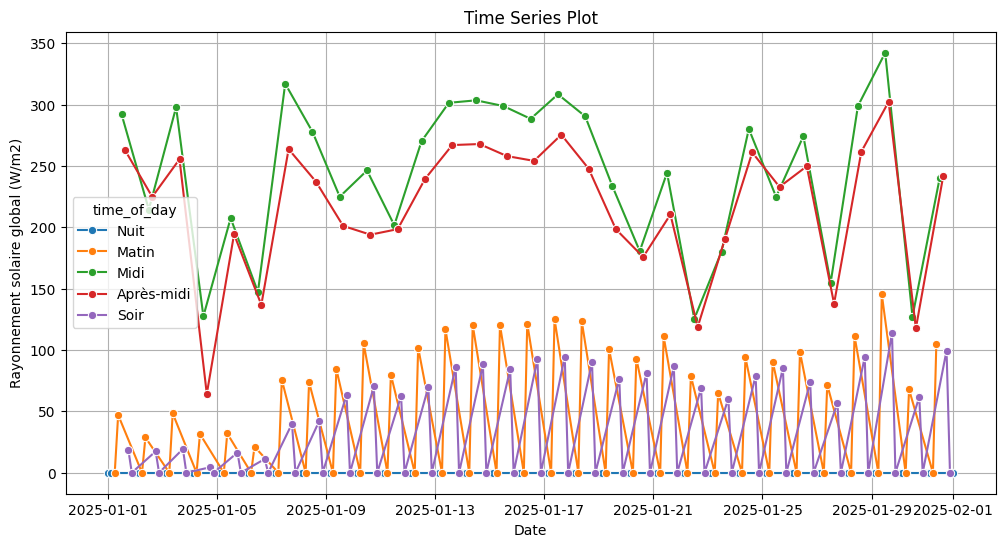

In [34]:
# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_93_2025_sorted, x='date', y='ssrd03h',
             hue='time_of_day', marker='o')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Rayonnement solaire global (W/m2)')
plt.grid(True)
plt.show()

## Exploration du portail Meteo France
* Source des données : [portail-api.meteofrance.fr](https://portail-api.meteofrance.fr/web/fr/)

In [1]:
# Import des modules utilisés
import requests
import pandas as pd
from io import BytesIO
# Pour utiliser les secrets dans Colab
from google.colab import userdata

In [9]:
# Commencer par générer le OAuth token sur le site Meteo France
# Lien de l'API testée ici : https://portail-api.meteofrance.fr/web/fr/api/DonneesPubliquesObservation

# Définition de l'url qui contient les données
url = 'https://public-api.meteofrance.fr/public/DPObs/v1/liste-stations'

# OAuth token
oauth_token = userdata.get('MeteoFrance_token')

# Ajout dans le header
headers = {
    'Authorization': f'Bearer {oauth_token}'
}

In [18]:
# Récupération des données
response = requests.get(url, headers=headers)

# Vérification de la bonne récupération
if response.status_code == 200:
# S'assurer que c'est du text/plain
# Si c'est JSON, probablement qu'il y a une erreur d'authentification (token incorrect/plus valide)
  if 'text/plain' in response.headers['Content-Type']:
    file_content = BytesIO(response.content)
    print("Données disponibles !\n")
    # Création du jeu de données
    df = pd.read_csv(file_content, delimiter=';', encoding='ISO-8859-1')
    print(f"Le dataframe contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
  else:
    print("Vérifier le token d'authentification")
else:
  print(f"Erreur: {response.status_code}")

Données disponibles !

Le dataframe contient 2130 lignes et 8 colonnes.


In [19]:
df.head()

,Id_station,Id_omm,Nom_usuel,Latitude,Longitude,Altitude,Date_ouverture,Pack
0,1014002,NaN,ARBENT,46.278167,5.669000,534,2003-10-01,RADOME
1,1027003,NaN,BALAN_AERO,45.833000,5.106667,196,2014-05-26,ETENDU
2,1034004,NaN,BELLEY,45.769333,5.688000,330,2001-09-13,RADOME
3,1064001,NaN,VERIZIEU,45.777167,5.487167,281,2015-01-01,ETENDU
4,1071001,NaN,CESSY,46.310333,6.080333,507,2002-05-01,RADOME


In [21]:
len(df['Id_station'].unique())

2130

In [ ]:
# TODO : extraire les départements avec lat/lon
# ex :
#url = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
#response = requests.get(url)
#departments = json.loads(response.text)

# URLs à exploiter :
# https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/#/resources
# https://www.data.gouv.fr/fr/datasets/carte-des-departements-2-1/#/resources

In [ ]:
from shapely.geometry import shape, Point

# Define a function to get the department name
def get_department(latitude, longitude):
    point = Point(longitude, latitude)
    for feature in departments['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['nom']
    return None

In [ ]:
# Test the function
latitude = 48.8566
longitude = 2.3522
department = get_department(latitude, longitude)
print(f"The department is: {department}")

In [ ]:
# TODO : identifier les stations du 93

In [ ]:
# TODO : permettra de récupérer tous les paramètres dispos pour une station (puis toutes)
# url = 'https://public-api.meteofrance.fr/public/DPObs/v1/station-horaire'
# Quel différénce entre les deux urls ?
# url = 'https://public-api.meteofrance.fr/public/DPObs/v1/station-infrahoraire-6m'

In [ ]:
# TODO : puis, tester l'API suivante :
# https://portail-api.meteofrance.fr/web/fr/api/DonneesPubliquesClimatologie
# Contient les GET suivant :
# /liste-stations/infrahoraire-6m
# /liste-stations/horaire
# /liste-stations/quotidienne
# /information-station